# Appetizer Task: Hand-Written Digit Classification with Least-Squares

In [1]:
###Do not change the code here
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
import numpy as np


## Appetizer Task
Please read the Appetizer section in the pdf file for the project requirement.

In [2]:
###Do not change the code here
train_data_path = "MNIST_Sub/" + "train_data.txt"
train_labels_path = "MNIST_Sub/" + "train_labels.txt"
test_data_path = "MNIST_Sub/" + "test_data.txt"
test_labels_path = "MNIST_Sub/" + "test_labels.txt"


### the dataset class is provided ###
class Dataset:
    def __init__(self, train_data_path, train_labels_path, test_data_path, test_labels_path):
        self.train_data_path = train_data_path
        self.train_labels_path = train_labels_path
        self.test_data_path = test_data_path
        self.test_labels_path = test_labels_path
        
        self.train_data = []
        self.train_labels = []
        self.test_data = []
        self.test_labels = []

    def dataloader(self,):
            '''
            The shape of train data should be (n_samples,28^2)
            '''
            with open(self.train_data_path, "r") as f:
                for line in f:
                    self.train_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
                self.train_data = np.array(self.train_data)

            with open(self.train_labels_path, "r") as f:
                for line in f:
                    self.train_labels.append(int(line.strip()))
                self.train_labels = np.array(self.train_labels)
                

            with open(self.test_data_path, "r") as f:
                for line in f:
                    self.test_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
                self.test_data = np.array(self.test_data)
                

            with open(self.test_labels_path, "r") as f:
                for line in f:
                    self.test_labels.append(int(line.strip()))
                self.test_labels = np.array(self.test_labels)
                
                


In [3]:
###Do not change the code###
###load data###
data = Dataset(train_data_path, train_labels_path, test_data_path, test_labels_path)
data.dataloader()
x_train, y_train, x_test, y_test = data.train_data, data.train_labels, data.test_data, data.test_labels
print("# of training samples:", x_train.shape[0])
print("# of testing samples:", x_test.shape[0])

# of training samples: 1000
# of testing samples: 200


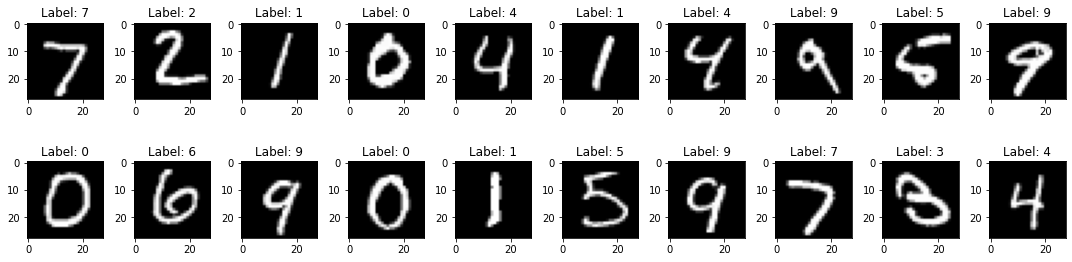

In [4]:
### Do not change the code ###
### visualize the samples 

def visualization(x, y_true, y_pred = None, rows = 2, cols = 5, split = 'train'):
    num_row = rows
    num_col = cols
    images = np.reshape(x, (-1, 28, 28))
    labels_true = y_true
    labels_pred = y_pred
    
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num_row * num_col):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], cmap='gray')
        if split == 'train':
            ax.set_title('Label: {}'.format(labels_true[i]))
        elif split == 'test':
            col = 'green'
            if labels_pred[i] != labels_true[i]:
                col = 'red'
            ax.set_title('Label: {} vs {}'.format(labels_true[i], labels_pred[i]), color = col)
            
    plt.tight_layout()
    plt.show()
    
visualization(x_train, y_train, rows = 2, cols = 10)

In [5]:
###TODO: implement your functions, don't change input 

#add a bias column to x 
def add_bias_column(x):
    bias = np.ones([x.shape[0], 1])
    return np.concatenate((x,bias), 1)

###the main function for solving theta, refer to the project requirement
def classifier(x, y, classes=10):
    #x: train_data
    #y: train_labels
    #classes: # of classes
   
    x = add_bias_column(x)
    theta = np.zeros([x.shape[1], classes])
    
    ### your code starts here ###
    # Add the random factor to each entry in x
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += np.random.uniform(-0.001, 0.001)
    
    # Create the one hot encoding matrix for y
    labs = np.zeros([y.shape[0], classes])
    for i in range(len(y)):
        for j in range(classes):
            if j == y[i]:
                labs[i][j] = 1
            
            else:
                labs[i][j] = -1
    
    # Multiply by the transpose on both sides
    ls = x.transpose() @ x
    rs = x.transpose() @ labs
    
    # Solve for theta
    theta = np.linalg.solve(ls, rs)
    ### your code ends here ###
    
    return theta
    
#evaluate your solution on test data
def evaluate(x, y, theta):
    x = add_bias_column(x)
    y_pred = np.matmul(x, theta)
    y_pred = np.argmax(y_pred, 1)
    accuracy = (y_pred == y).mean()
    
    return accuracy

def get_pred(x, y, theta):
    x = add_bias_column(x)
    y_pred = np.matmul(x, theta)
    y_pred = np.argmax(y_pred, 1)
    
    return y_pred

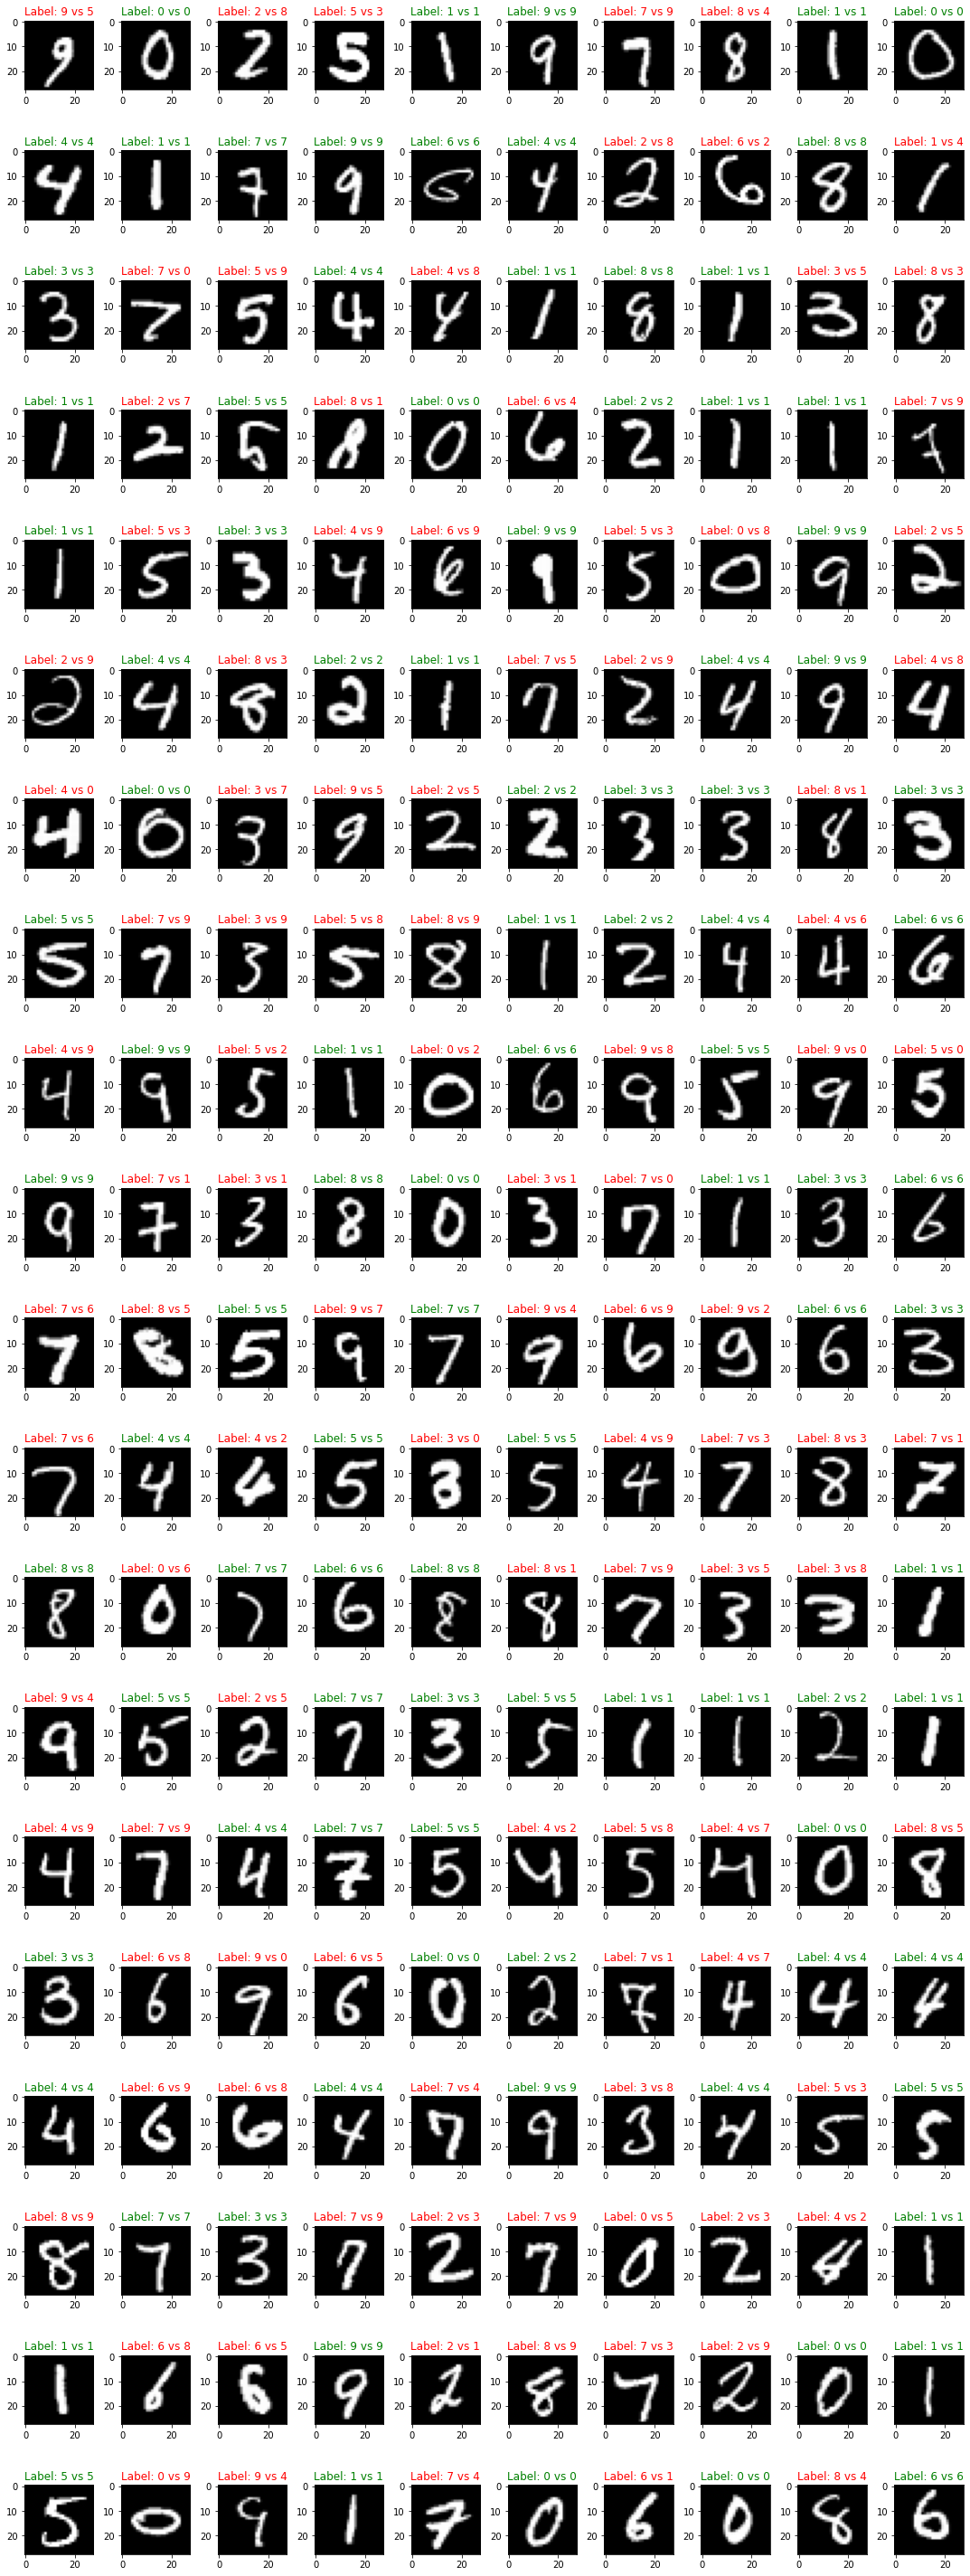

In [6]:
###Run your code and vialize the prediction result
 
theta = classifier(x_train, y_train) ###solve Theta
pred = get_pred(x_test, y_test, theta)

### !!! this line will take a while.
visualization(x_test, y_test, pred, int(y_test.shape[0] / 10), 10, split='test')
# the right prediction will have green label while wrong prediction will have red label

# if your computer takes too long, please use the following line instead. it'll show a subset of images and their predictions
# visualization(x_test, y_test, pred, 5, 10, split='test')

In [7]:
### print out the test accuracy
training_accuracy=evaluate(x_train, y_train, theta)
print("Training accuracy is:", training_accuracy)

testing_accuracy = evaluate(x_test, y_test, theta) ###test 
print("Testing accuracy is:", testing_accuracy)


Training accuracy is: 0.979
Testing accuracy is: 0.49
